In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [23]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='ISO-8859-1')


In [24]:
df.shape

(11251, 15)

In [25]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#**Data Cleaning**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Drop Unrelated columns/empty columns**

In [27]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

**Checking for Null Values/Missing Values**

In [28]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

**Checking the distribution of "Amount" column to fill in the Null values.**

<Axes: xlabel='Amount', ylabel='Count'>

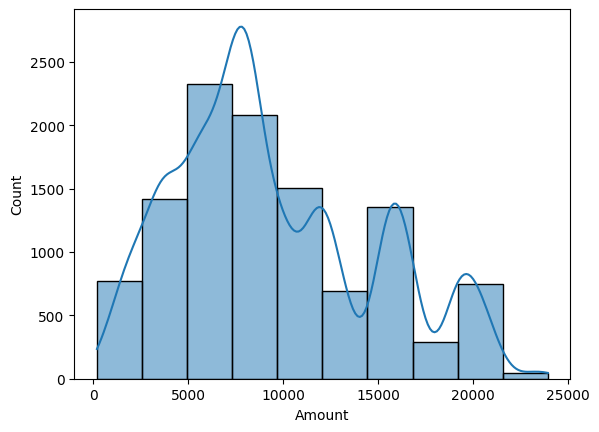

In [29]:
sns.histplot(df["Amount"],kde=True,bins=10)

<Axes: >

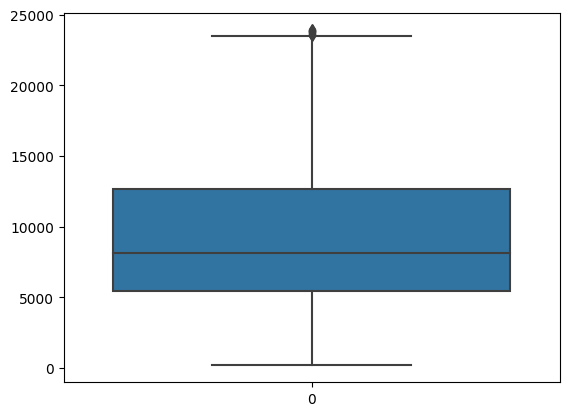

In [30]:
sns.boxplot(df["Amount"])

In [ ]:
df["Amount"].mean()

9453.610857727557

In [ ]:
df["Amount"].median()

8109.0

Filling the missing value with Mean value

In [32]:
df["Amount"]=df["Amount"].fillna(df["Amount"].mean())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11251 entries, 1002903 to 1002744
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cust_name         11251 non-null  object 
 1   Product_ID        11251 non-null  object 
 2   Gender            11251 non-null  object 
 3   Age Group         11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11251 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.1+ MB


**Converting the data type of "Amount" to int as there are no decimal values.**

In [33]:
df["Amount"]=df["Amount"].astype('int')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Checking the Statistical values of Numerical Variables**

In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.609901
std,12.754122,1.115047,5219.569169
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


#**Exploratory Data Analysis**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Doing the Univariate Analysis and Bivariate Analysis w.r.t "Amount"**

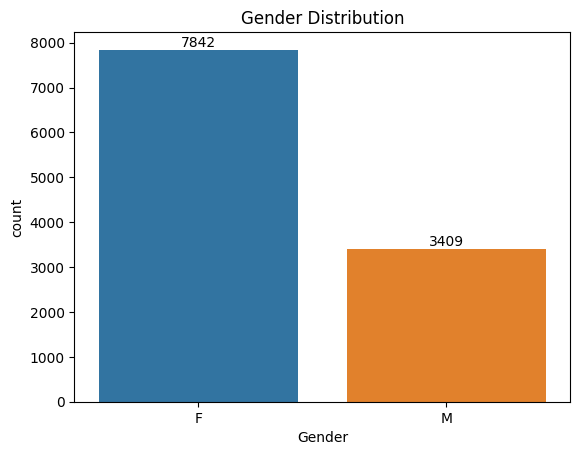

In [34]:
#For Gender
ax=sns.countplot(df,x='Gender')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Gender Distribution')
plt.show()

*Observing the graph we can say Female have done more shopping compared to Male population*

In [38]:
gender_amount=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
gender_amount

,Gender,Amount
0,F,74416943
1,M,31929494


Text(0.5, 1.0, 'Amount vs Gender')

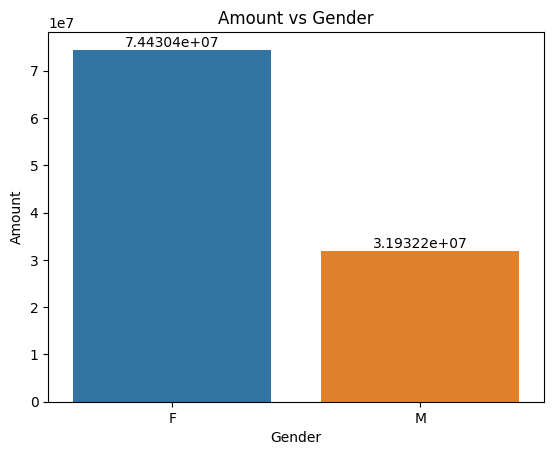

In [ ]:
ax=sns.barplot(gender_amount,x='Gender',y='Amount')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Amount vs Gender')

*Amount spent by Female population is more than the Male population- hence the purchasing power is more for Female population.*

**Bivariate analysis of "Age Group" and "Gender".**

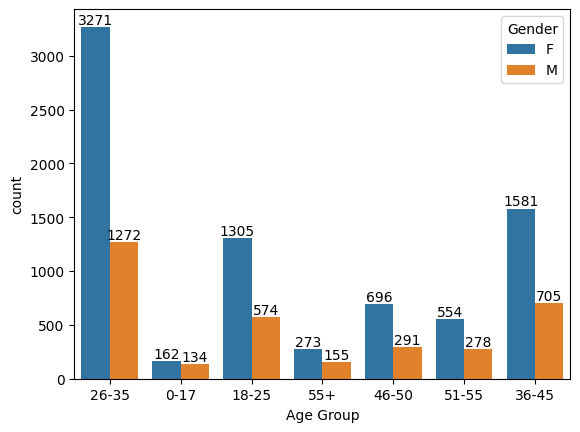

In [ ]:
ax=sns.countplot(df,x="Age Group",hue="Gender")
for bars in ax.containers:
  ax.bar_label(bars)

*More shopping is done by Female group of age 26-35 and 36-45.*

*Maximum shopping is done from the age group- 26-35.*

<Axes: xlabel='Age Group', ylabel='Amount'>

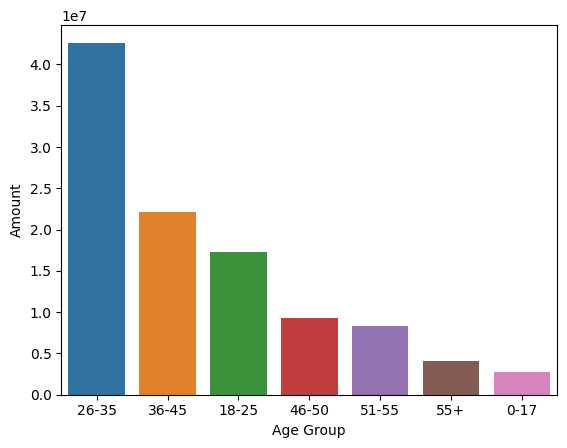

In [ ]:
age_amount=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(age_amount,x='Age Group',y='Amount')

*Maximum Amount spent is from the  Age Group of 26-35.*

Text(0.5, 1.0, 'State wise amount spent')

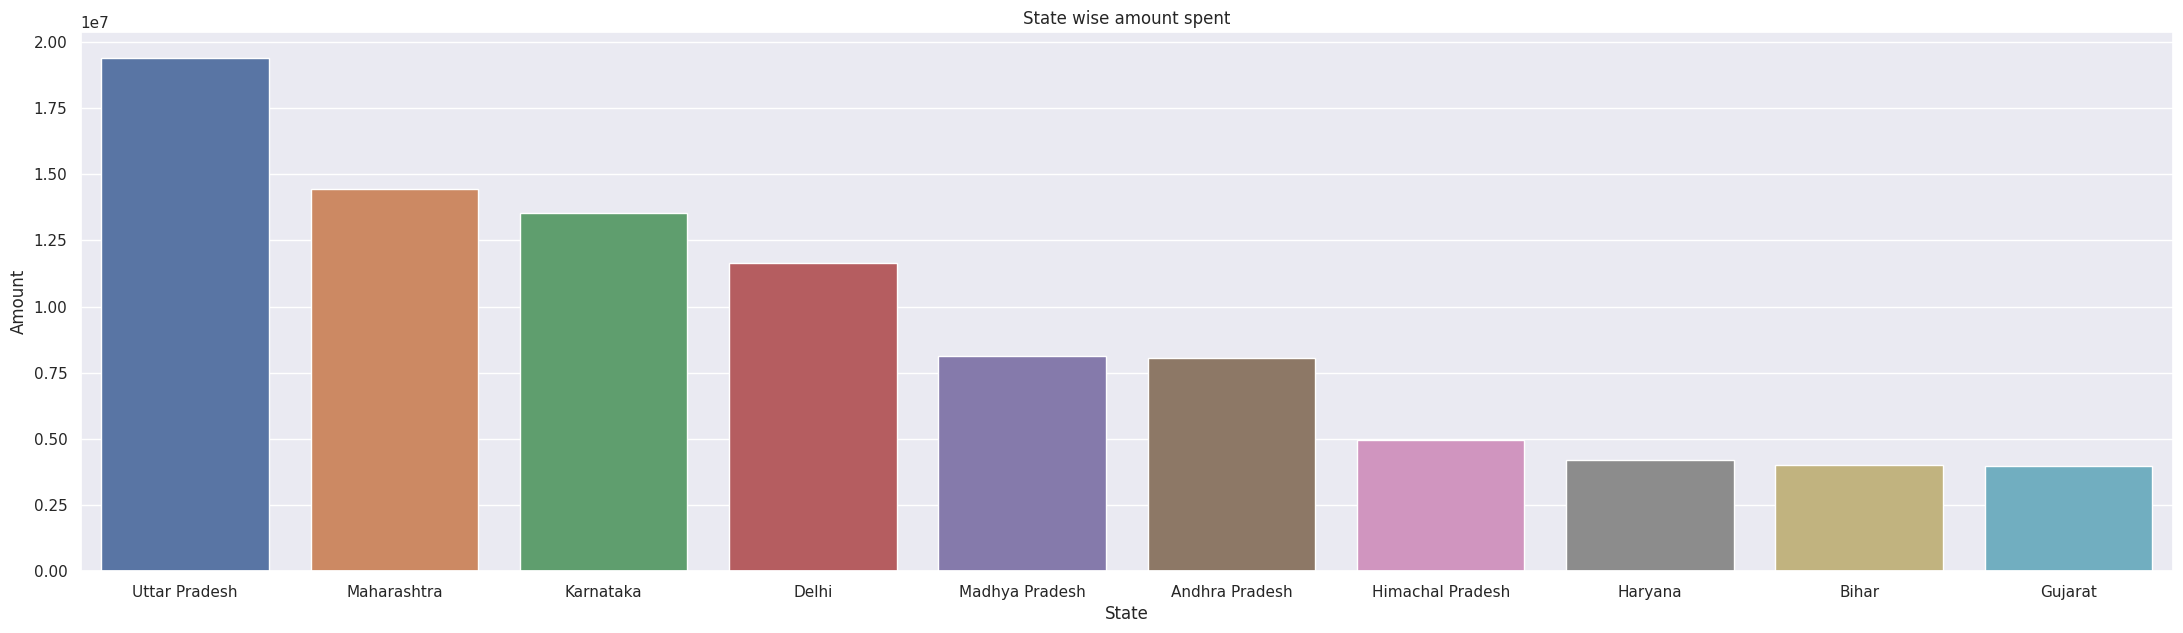

In [39]:
state_amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(27,7)})
sns.barplot(state_amount,x='State',y="Amount")
plt.title("State wise amount spent")


*Uttar Pradesh, Maharashtra and Karnataka are the Top 3 states who spent the most.*

Text(0.5, 1.0, 'State wise amount spent')

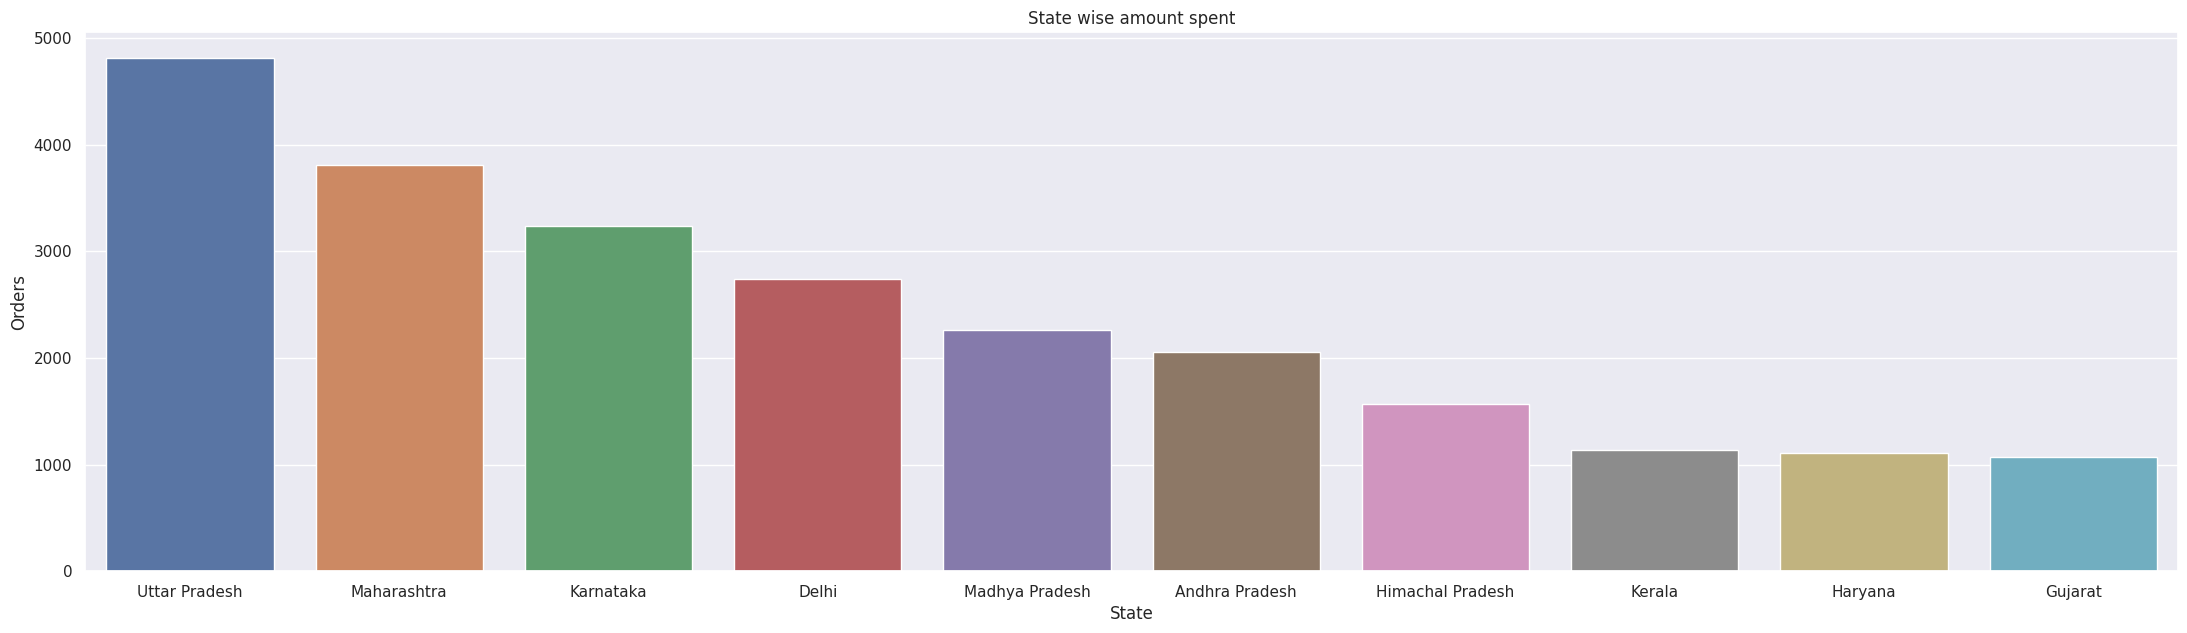

In [ ]:
state_orders=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(27,7)})
sns.barplot(state_amount,x='State',y="Orders")
plt.title("State wise amount spent")

*Uttar Pradesh, Maharashtra and Karnataka are the Top 3 states who ordered the most.*

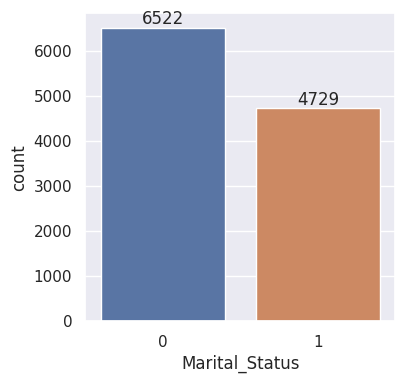

In [ ]:
ax=sns.countplot(df,x="Marital_Status")
sns.set(rc={'figure.figsize':(3,3)})
for bars in ax.containers:
  ax.bar_label(bars)

*Unmarried population ordered the most during the Sale days.*

**Multivariate Analysis of Marital status and Gender with repect to Amount**

<Axes: xlabel='Marital_Status', ylabel='Amount'>

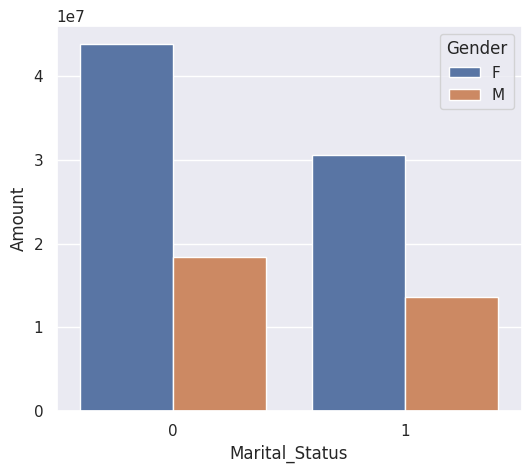

In [ ]:
marital_gender_amount=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(marital_gender_amount,x='Marital_Status',y='Amount',hue='Gender')



From the above two graphs we can conclude that most of the buyers are Women(dominantly Unmarried) and they have high purchasing power.

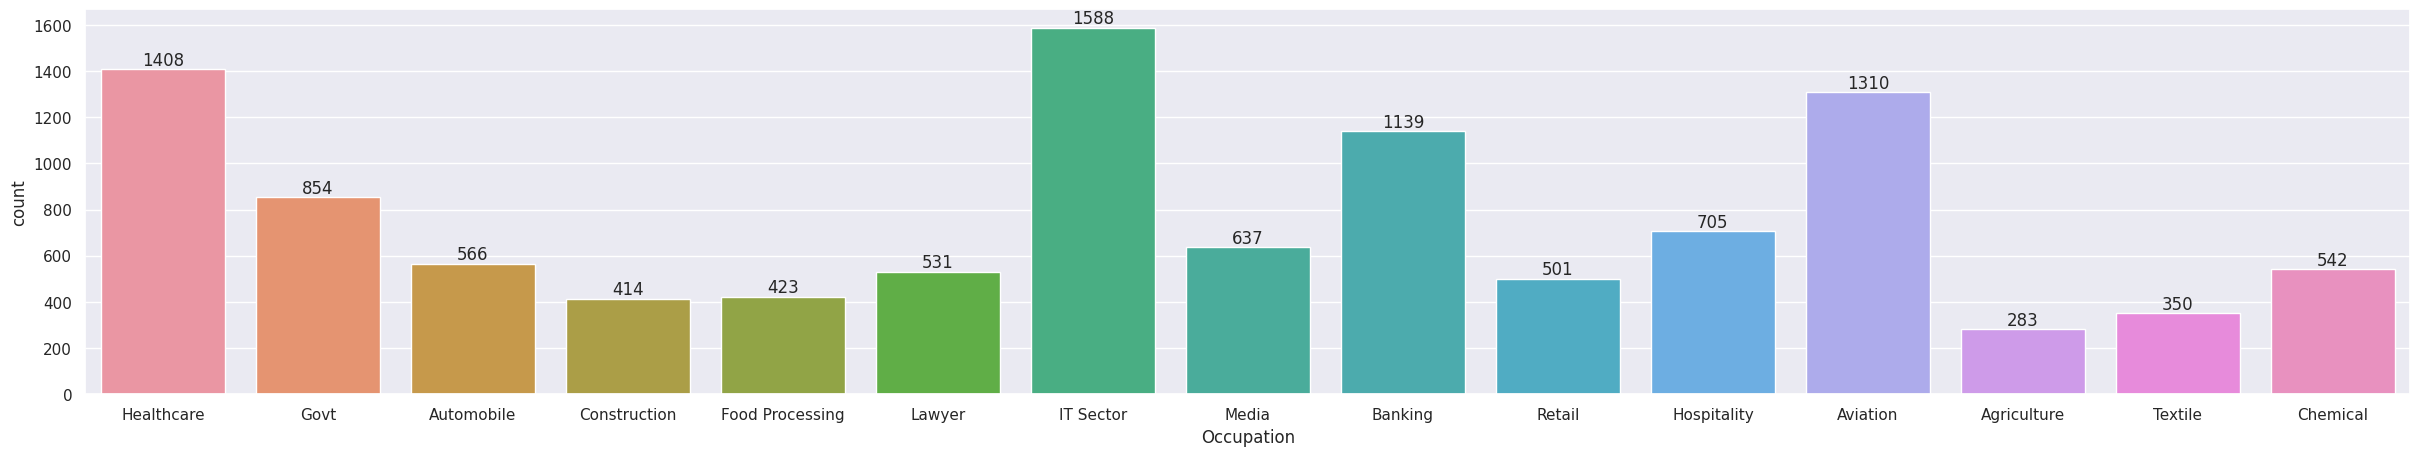

In [ ]:
ax=sns.countplot(df,x="Occupation")
sns.set(rc={'figure.figsize':(31,5)})
for bars in ax.containers:
  ax.bar_label(bars)

*From the above we can observe- Maximum order have been placed by people who are working in IT sector, Healthcare sector and Aviation Industry.*

<Axes: xlabel='Occupation', ylabel='Amount'>

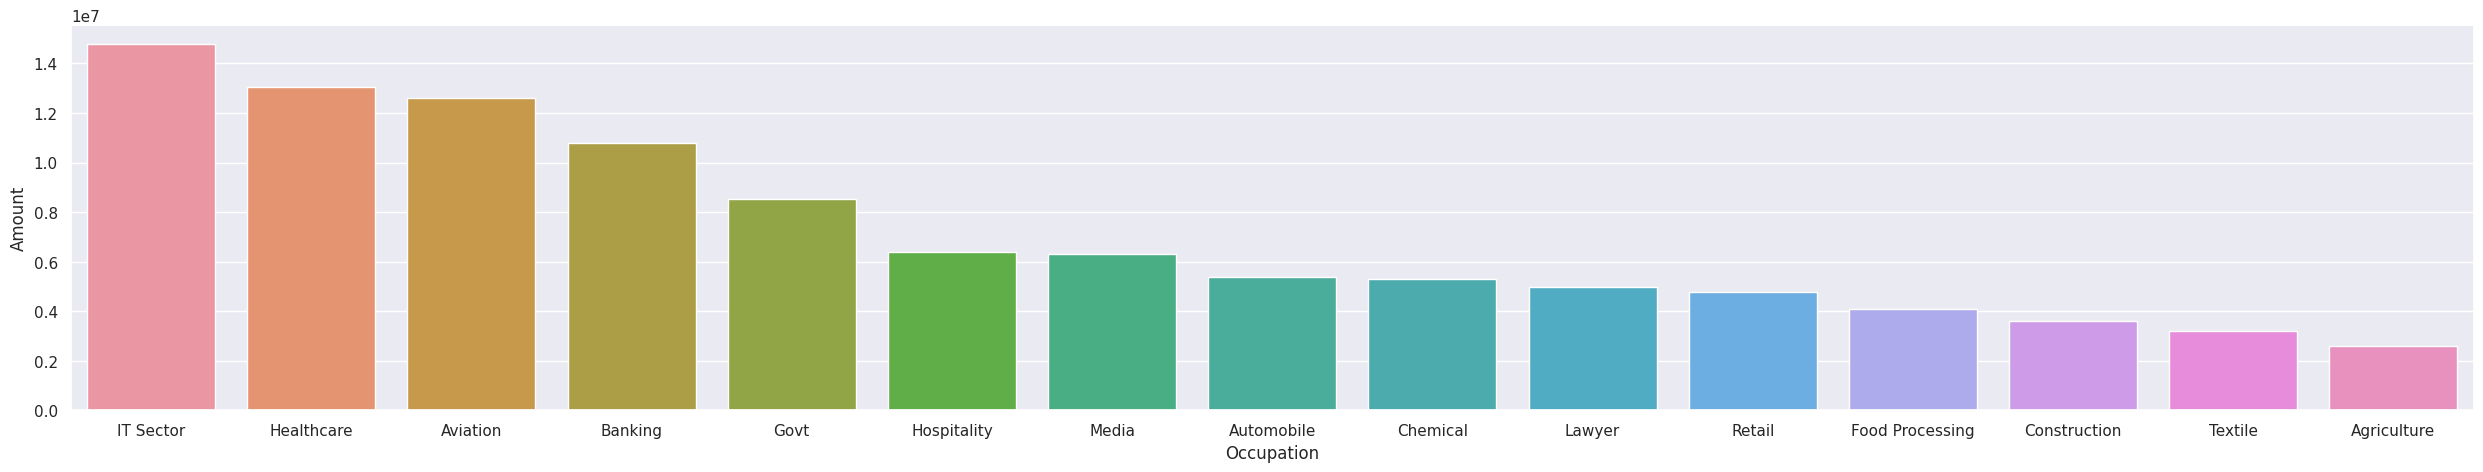

In [ ]:
occupation_amount = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(31,5)})
sns.barplot(data = occupation_amount, x = 'Occupation',y= 'Amount')

*From the above we can observe- Maximum amount have been spent by people who are working in IT sector, Healthcare sector and Aviation Industry.*

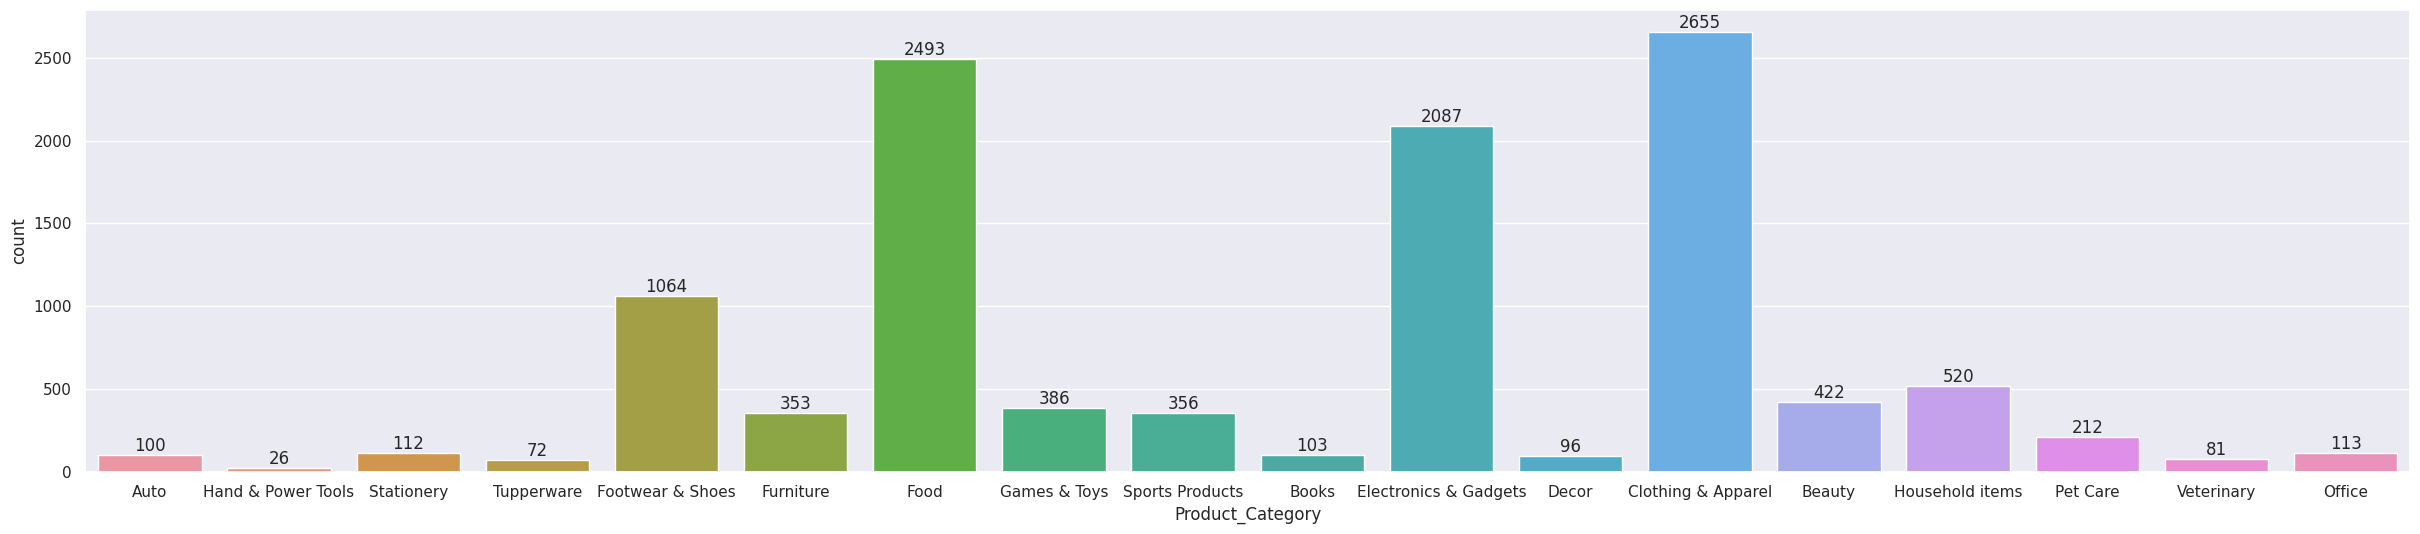

In [ ]:
sns.set(rc={'figure.figsize':(30,6)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph we can observe the Top 3 ordered product are from Clothing & Apparel, Electronics & Gadgets and Food category.*

<Axes: xlabel='Product_Category', ylabel='Amount'>

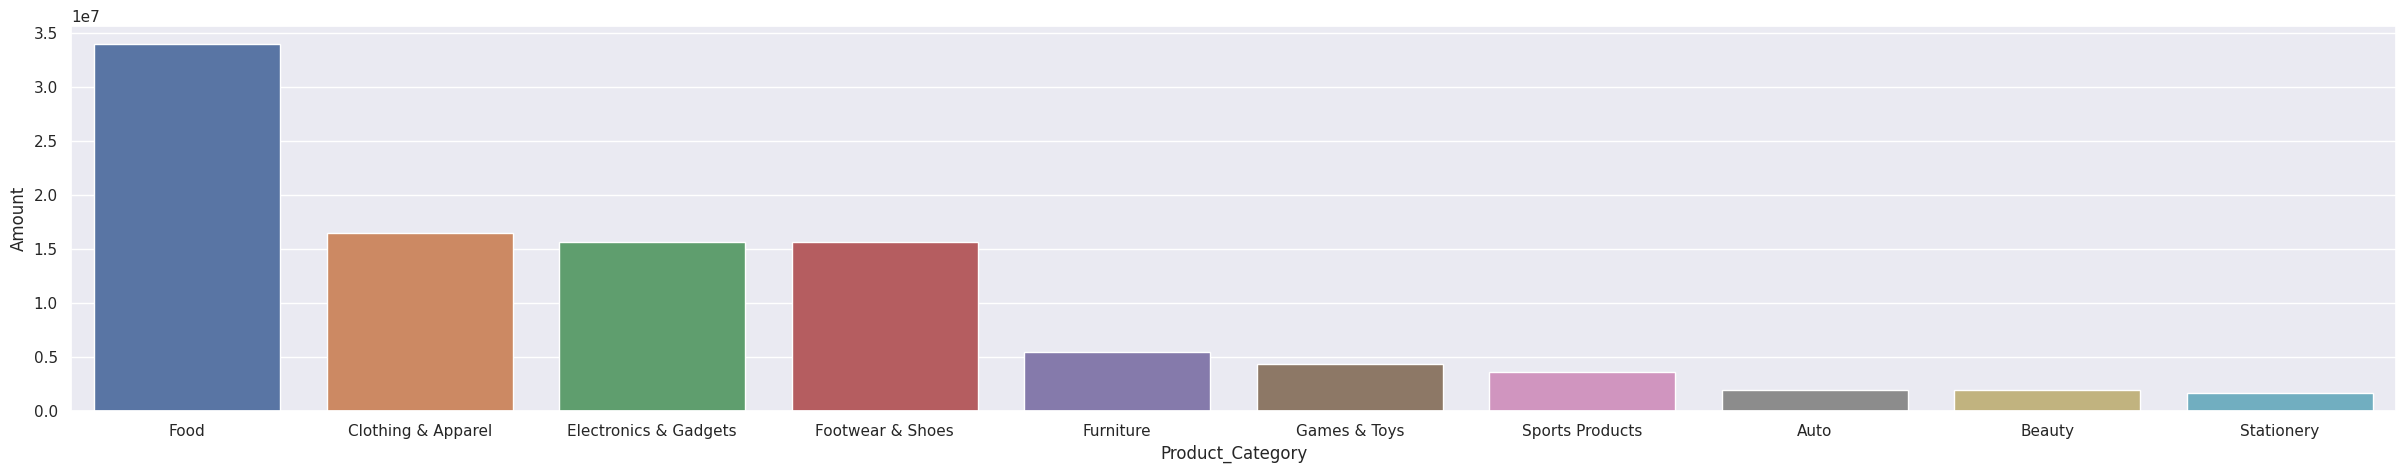

In [ ]:
product_amount = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data = product_amount, x = 'Product_Category',y= 'Amount')

*From the above graph we can observe the Top 3 product on which maximum amount been spent are Food, Clothing & Apparel and Electronics & Gadgets category.*

<Axes: xlabel='Product_ID', ylabel='Orders'>

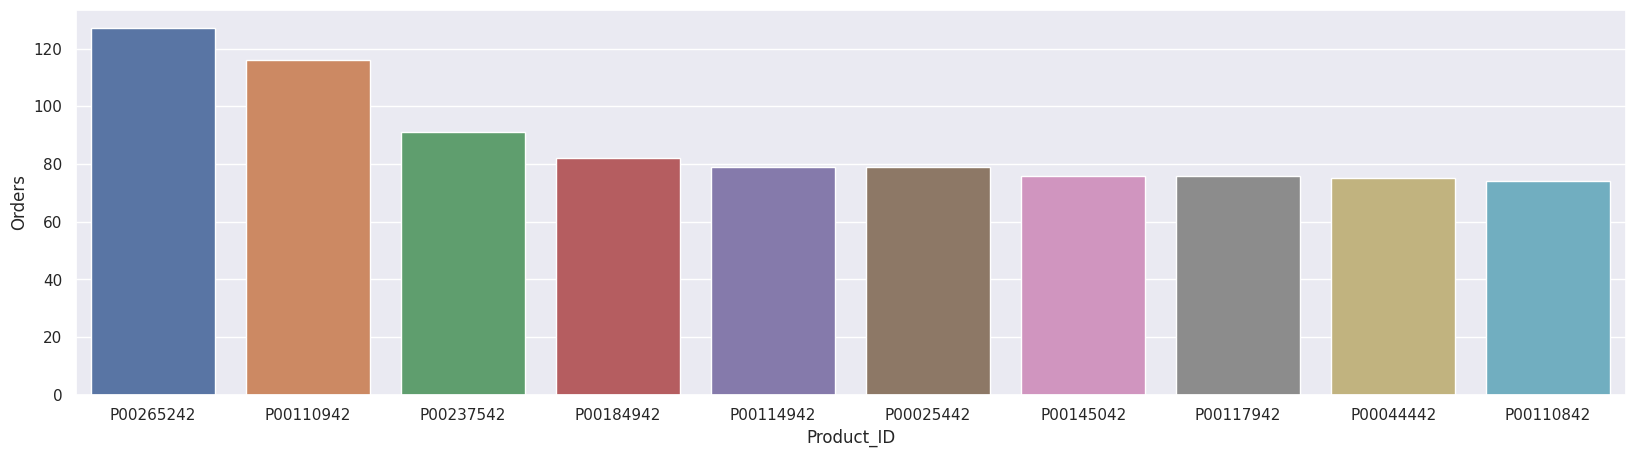

In [ ]:
product_order = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = product_order, x = 'Product_ID',y= 'Orders')

*The Top 3 ordered product IDs are P00265242,P00110942 and P00237542.*

#**Final Conclusion**

*Married women from the age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

#**Thank you!!!**